Otsu's Threshold Value: 101.0


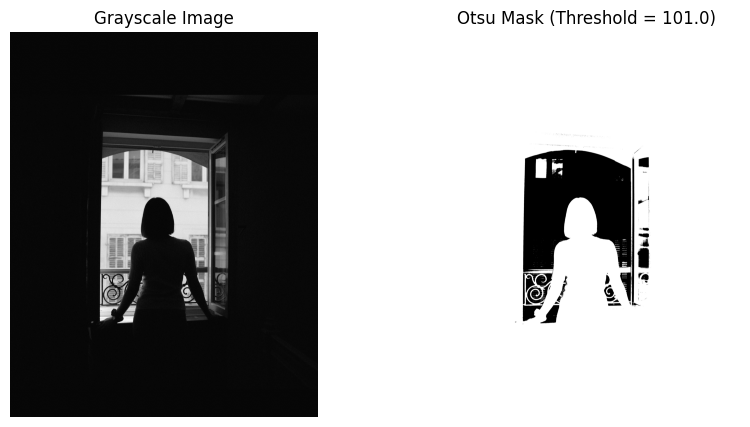

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img_bgr = cv.imread('media/looking_out.jpg')
img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)

# We use THRESH_BINARY_INV because the object we want (Woman/Room) is DARK.
otsu_value, binary_mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

print(f"Otsu's Threshold Value: {otsu_value}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title(f"Otsu Mask (Threshold = {otsu_value})")
plt.axis('off')
plt.show()

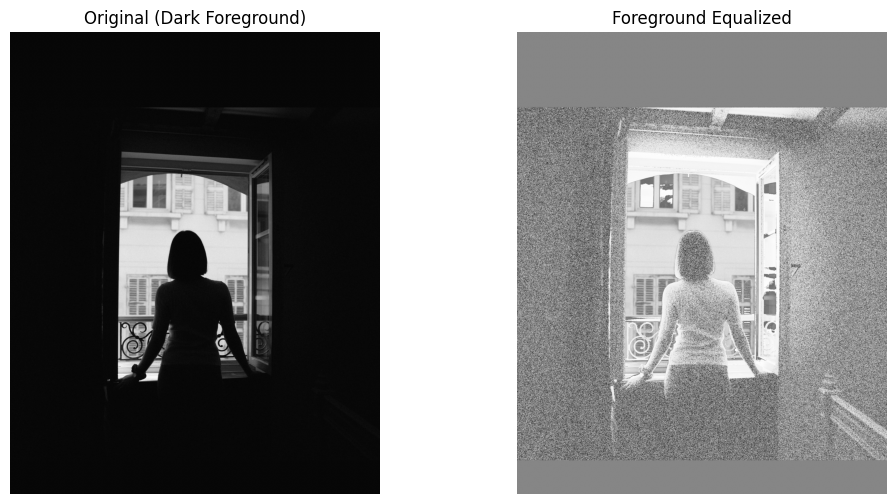

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv.imread('media/looking_out.jpg')
img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)

otsu_value, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
hist = cv.calcHist([img_gray], [0], mask, [256], [0, 256])
cdf = hist.cumsum()

cdf_masked = np.ma.masked_equal(cdf, 0)
cdf_normalized = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
cdf_final = np.ma.filled(cdf_normalized, 0).astype('uint8')
img_equalized_temp = cdf_final[img_gray]

foreground_part = cv.bitwise_and(img_equalized_temp, img_equalized_temp, mask=mask)
background_part = cv.bitwise_and(img_gray, img_gray, mask=cv.bitwise_not(mask))
final_result = cv.add(foreground_part, background_part)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original (Dark Foreground)")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(final_result, cmap='gray')
plt.title("Foreground Equalized")
plt.axis('off')
plt.show()